In [1]:
%load_ext rpy2.ipython

In [236]:
%%R 
library(tidyverse)
library(cowplot)

In [20]:
%%R -o titanic_data
titanic_data <- read_csv("../data/titanic.csv")

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

I'll level with you here, I honestly though there were going to be more data columns... This is prety sparse..

In [5]:
%%R -o titanic_train_data
titanic_train_data <- read_csv("../data/train.csv")

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
titanic_train_data

PassengerId  Survived  Pclass  \
1            1.0       0.0     3.0   
2            2.0       1.0     1.0   
3            3.0       1.0     3.0   
4            4.0       1.0     1.0   
5            5.0       0.0     3.0   
..           ...       ...     ...   
887        887.0       0.0     2.0   
888        888.0       1.0     1.0   
889        889.0       0.0     3.0   
890        890.0       1.0     1.0   
891        891.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
1                              Braund, Mr. Owen Harris    male  22.0    1.0   
2    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
3                               Heikkinen, Miss. Laina  female  26.0    0.0   
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
5                             Allen, Mr. William Henry    male  35.0    0.0   
..                                                 ...     ...   ...    ...   
887                              Montvila, Rev. Juozas    male  27.0    0.0   
888                       Graham, Miss. Margaret Edith  female  19.0    0.0   
889           Johnston, Miss. Catherine Helen "Carrie"  female   NaN    1.0   
890                              Behr, Mr. Karl Howell    male  26.0    0.0   
891                                Dooley, Mr. Patrick    male  32.0    0.0   

     Parch            Ticket     Fare Cabin Embarked  
1      0.0         A/5 21171   7.2500  None        S  
2      0.0          PC 17599  71.2833   C85        C  
3      0.0  STON/O2. 3101282   7.9250  None        S  
4      0.0            113803  53.1000  C123        S  
5      0.0            373450   8.0500  None        S  
..     ...               ...      ...   ...      ...  
887    0.0            211536  13.0000  None        S  
888    0.0            112053  30.0000   B42        S  
889    2.0        W./C. 6607  23.4500  None        S  
890    0.0            111369  30.0000  C148        C  
891    0.0            370376   7.7500  None        Q  

[891 rows x 12 columns]

Well, it seems the kaggle version has a bit more columns, but still not as many as I would have thought. Nevertheless, let's start poking around with the smaller one and see what we can see.

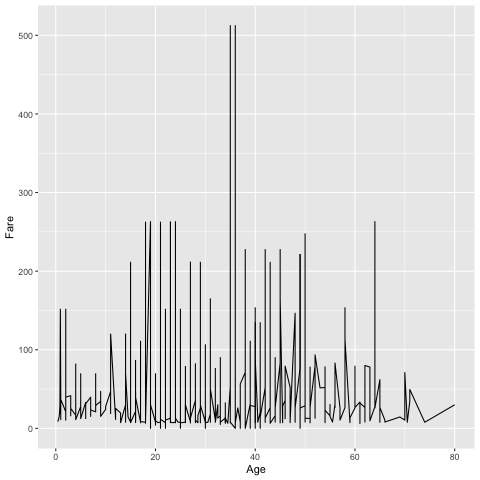

In [13]:
%%R 
titanic_data %>% 
	ggplot(aes(y = Fare, x = Age)) + 
		# geom_jitter() + 
		geom_line()

I mean that's a start.. WHoo, there really is going to be quite a bit of work to be done with this.

In [7]:
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

In [21]:
titanic_data["row"] = range(titanic_data.shape[0])
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
1      male  22.0                      1.0                      0.0   7.2500   
2    female  38.0                      1.0                      0.0  71.2833   
3    female  26.0                      0.0                      0.0   7.9250   
4    female  35.0                      1.0                      0.0  53.1000   
5      male  35.0                      0.0                      0.0   8.0500   
..      ...   ...                      ...                      ...      ...   
883    male  27.0                      0.0                      0.0  13.0000   
884  female  19.0                      0.0                      0.0  30.0000   
885  female   7.0                      1.0                      2.0  23.4500   
886    male  26.0                      0.0                      0.0  30.0000   
887    male  32.0                      0.0                      0.0   7.7500   

     row  
1      0  
2      1  
3      2  
4      3  
5      4  
..   ...  
883  882  
884  883  
885  884  
886  885  
887  886  

[887 rows x 9 columns]

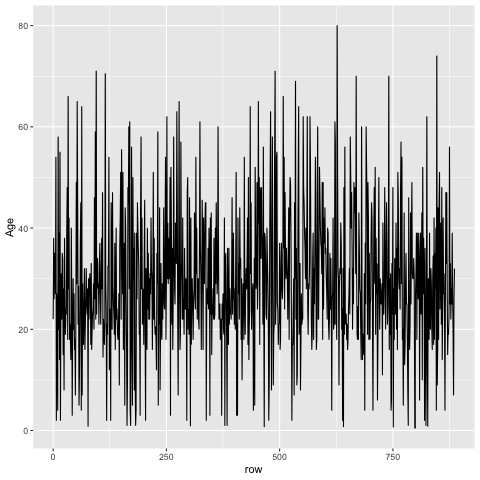

In [27]:
%%R -i titanic_data
titanic_data %>% 
	ggplot(aes(y = Age, x = row)) +
		geom_line()

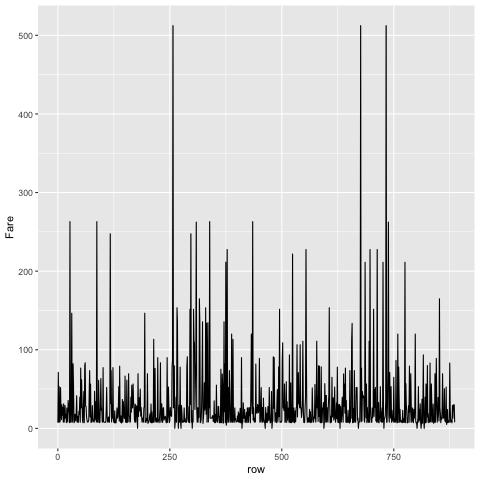

In [25]:
%%R -i titanic_data
titanic_data %>% 
	ggplot(aes(y = Fare, x = row)) +
		geom_line()

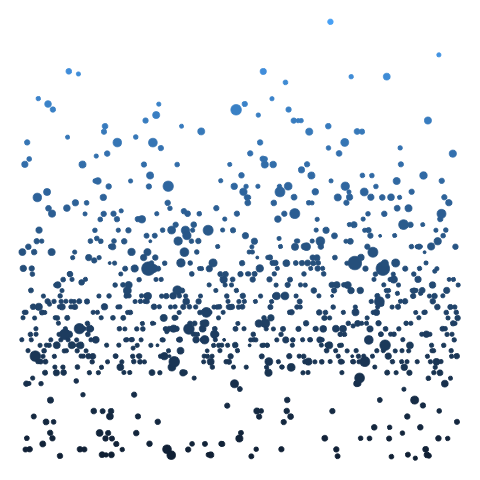

In [239]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		theme_nothing()

This is a bit interesting. It just shows the shape of the data! 

I think it would be nice to add in the row variable in R, so that I can play around with sorting and see how that makes it look.

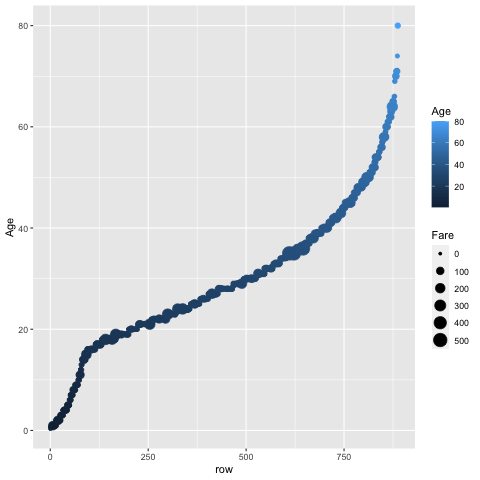

In [38]:
%%R 
titanic_data %>% 
	arrange(Age) %>%
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter()

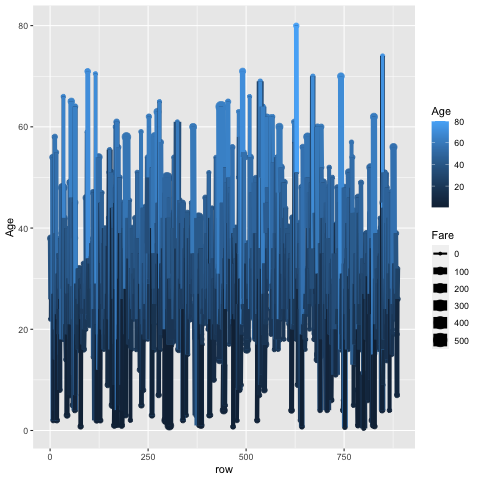

In [45]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line()

Alright this has some legs, we'll go with it!

# Plot 01


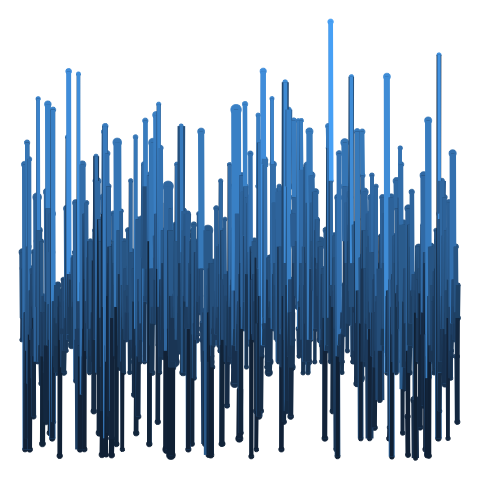

In [56]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		theme_nothing()

That already looks pretty cool. Maybe we can mess witht he colors?

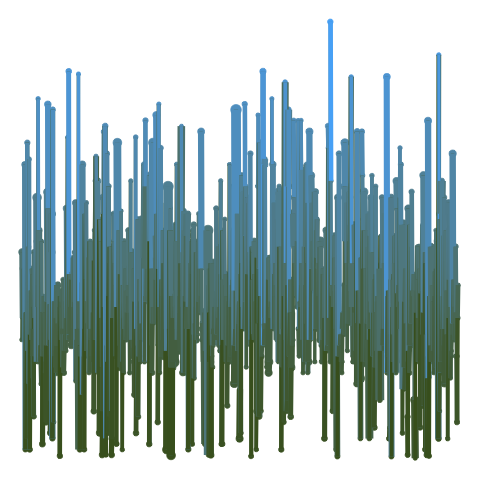

In [67]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#465F24") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

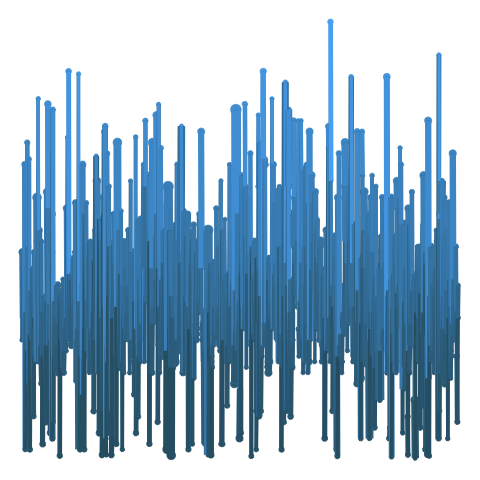

In [69]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

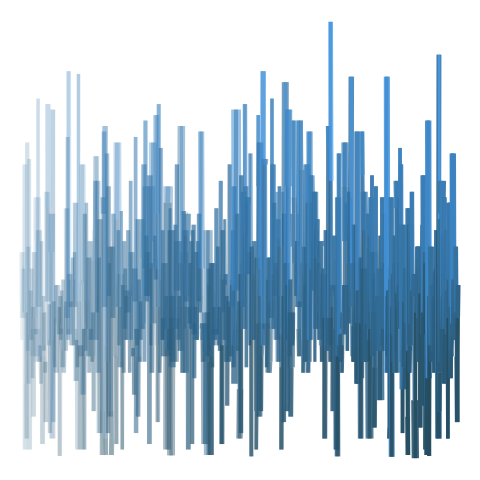

In [83]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		
		geom_line(aes(alpha = row)) +
		# geom_jitter() + 
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

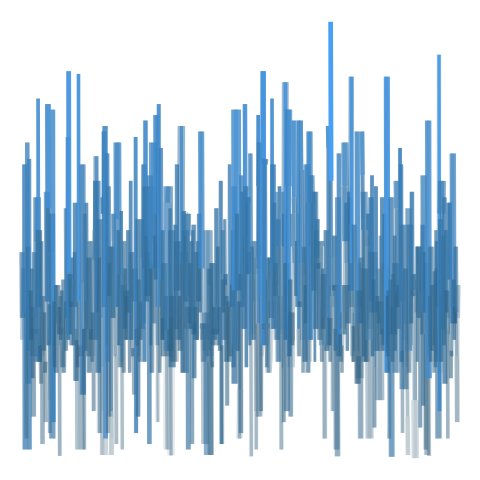

In [85]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		
		geom_line(aes(alpha = Age)) +
		# geom_jitter() + 
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

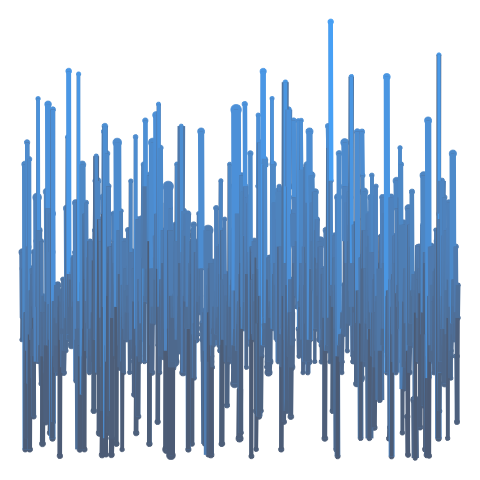

In [70]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#5E6F87") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

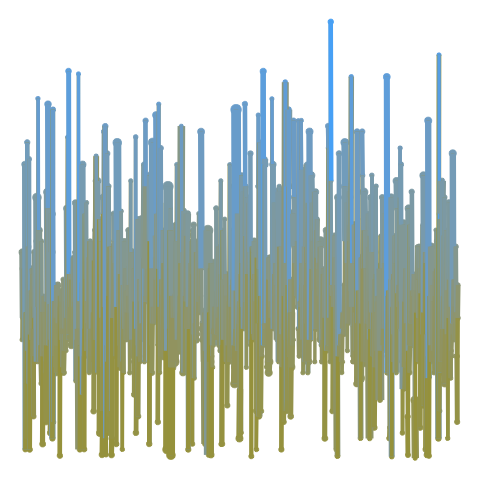

In [77]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#A6A04A") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

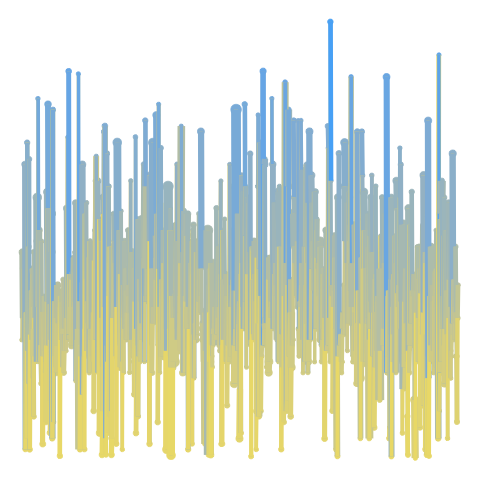

In [72]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#EDDD79") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

## different geoms


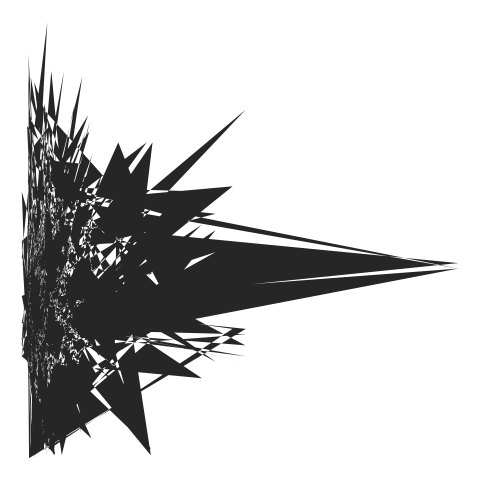

In [106]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = Fare,
	 	# size = Fare, 
		# fill = row
		)) +
		geom_polygon() + 
		# scale_fill_gradient(low = "red", high="blue") +

		theme_nothing()

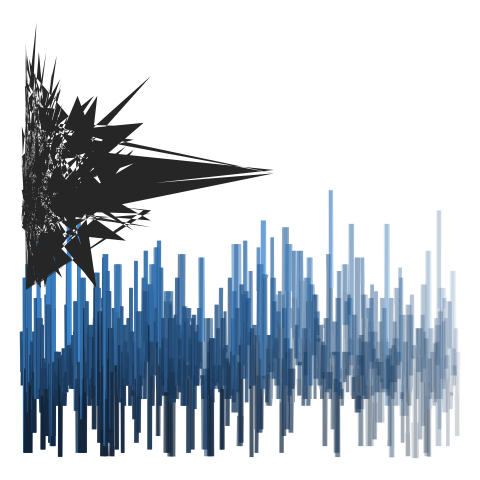

In [122]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot() +
		geom_line(aes(y = Age, x = row, size = Fare, col = Age, alpha = length(row) - row)) +
		geom_polygon(aes(y = Age+50, x = Fare)) + 
		# scale_fill_gradient(low = "red", high="blue") +
		theme_nothing()

Wow, I really like that!

## geom_spoke

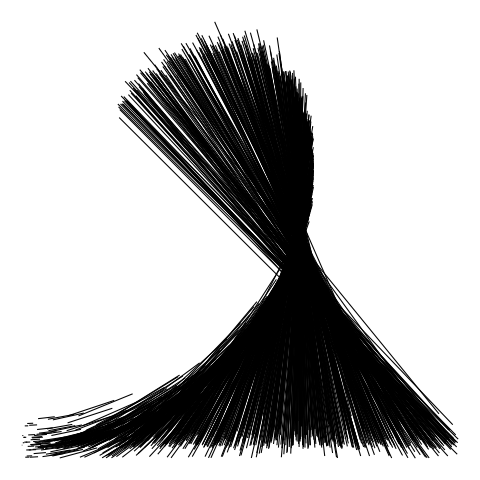

In [136]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = row)
		) +
		theme_nothing()


Now we're on to something!

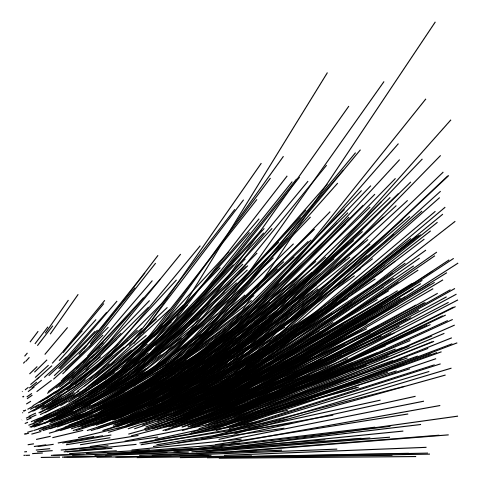

In [137]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row)
		) +
		theme_nothing()


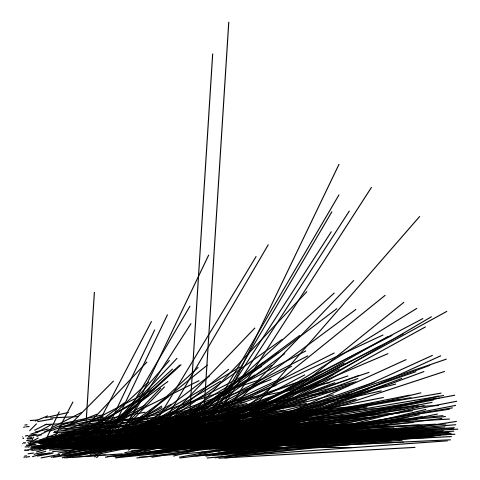

In [138]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Fare/360),
			radius = row)
		) +
		theme_nothing()


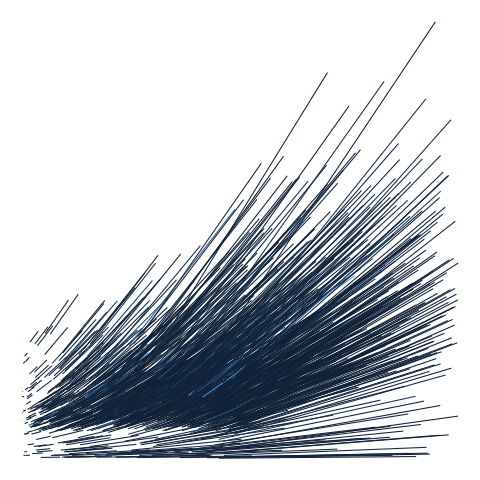

In [139]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Fare
			)
		) +
		theme_nothing()


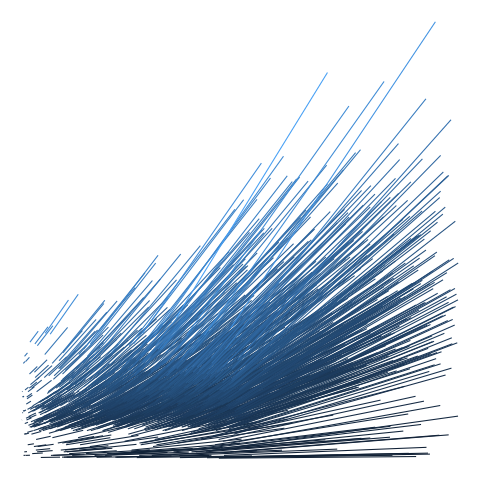

In [140]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age
			)
		) +
		theme_nothing()


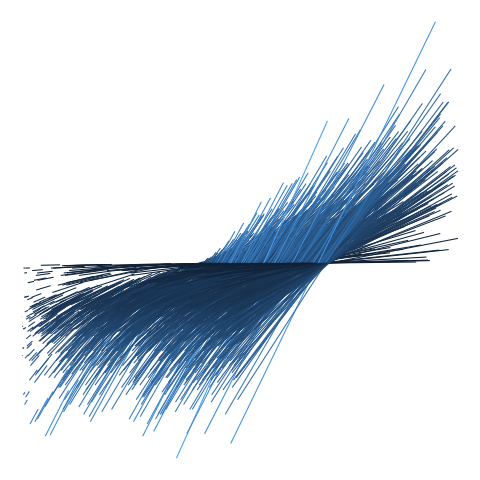

In [141]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age
			)
		) +
		theme_nothing()


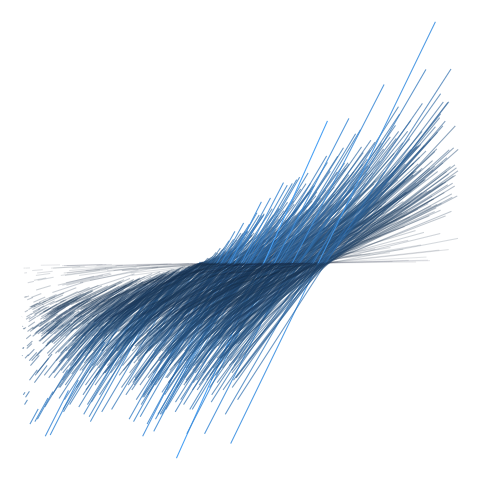

In [151]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age
			)
		) +
		theme_nothing()


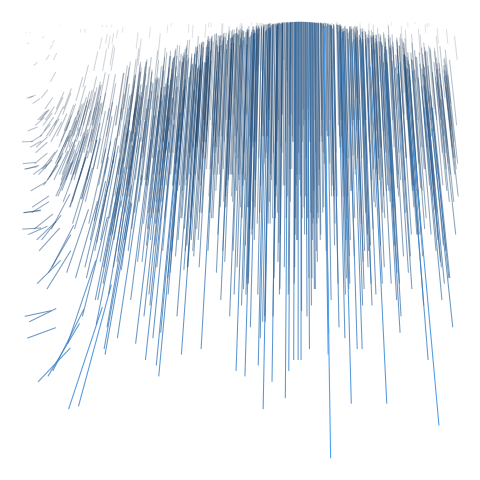

In [160]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = Age,
			col = Age,
			alpha = Age
			)
		) +
		theme_nothing()


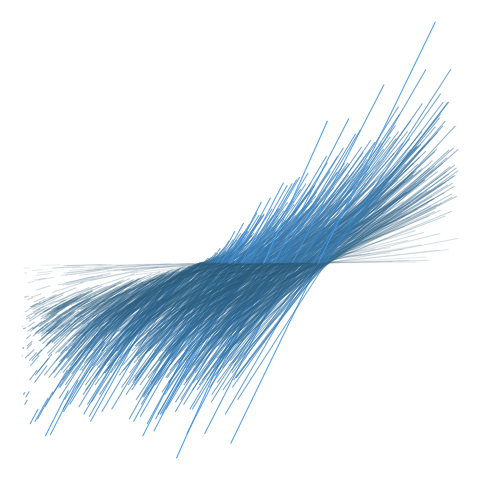

In [153]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age
			)
		) +
		scale_color_gradient( low = "#2F5F72" ) +
		theme_nothing()


Well this is really nice!

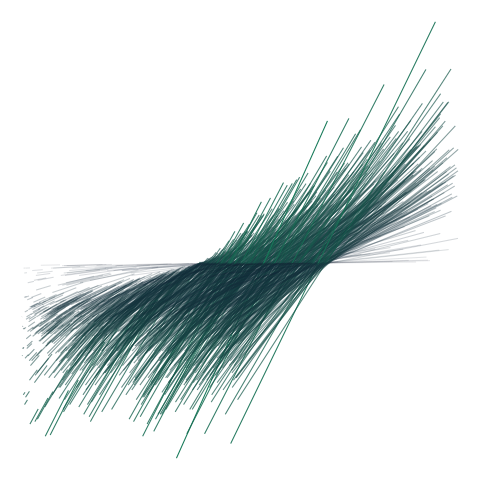

In [173]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot() +
		# geom_point() +
		geom_spoke(aes(
			y = -Age, x = row,
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age,
			inherit = FALSE
			)
		) +
		scale_color_gradient( high = "#118B6C" ) +
		theme_nothing()


So I've already identified some pretty cool things to work with here! I think what I'd like to do is a similar thing as before and make a 2x2 panel, so just pick out the 4 best plots and put them together. I think I'm well on my way!

Maybe I'll experiment with a few more geoms??

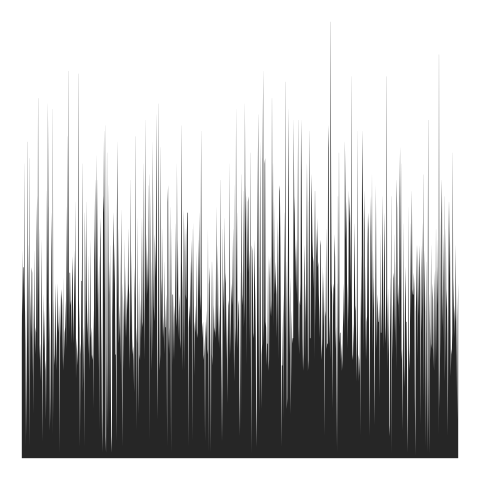

In [182]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		geom_area() +
		theme_nothing()


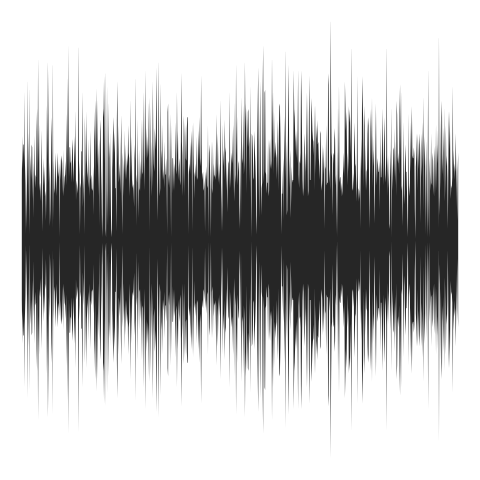

In [189]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = -Age, x = row)) +
		geom_area(aes(y = Age, x = row)) +
		theme_nothing()


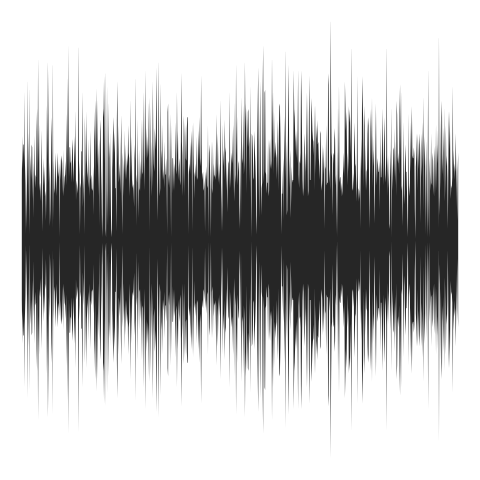

In [196]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = -Age, x = row)) +
		geom_area(aes(y = Age, x = row)) +
		theme_nothing()


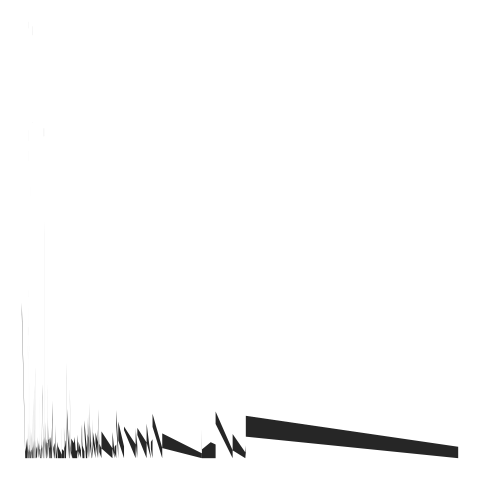

In [199]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = Age, x = Fare)) +
		theme_nothing()


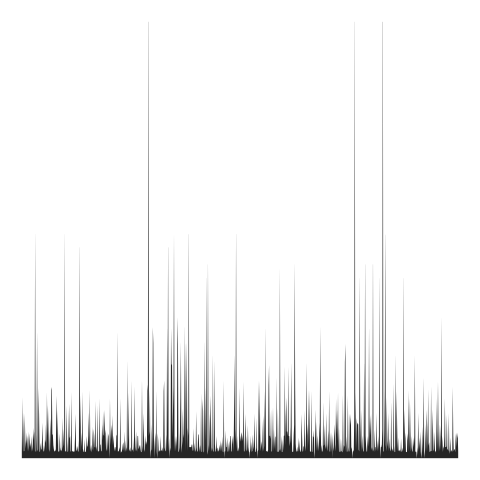

In [203]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = Fare, x = row)) +
		theme_nothing()


I mean that didn't get as exciting as I would have hoped..

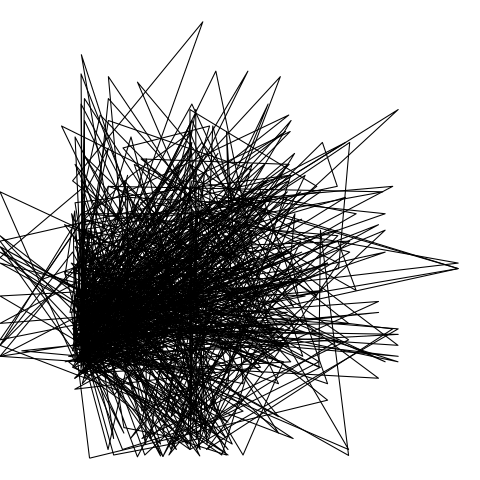

In [210]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path() +
		theme_nothing()


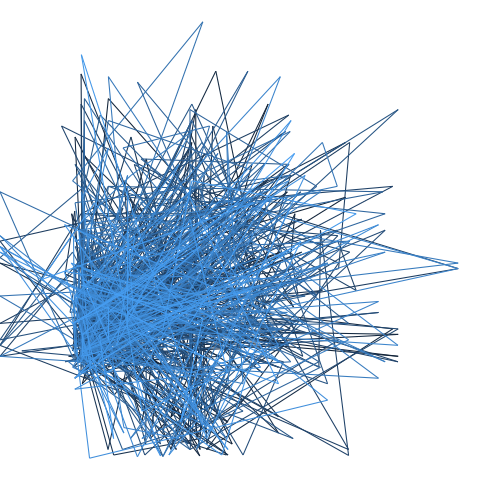

In [211]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = row)) +
		theme_nothing()


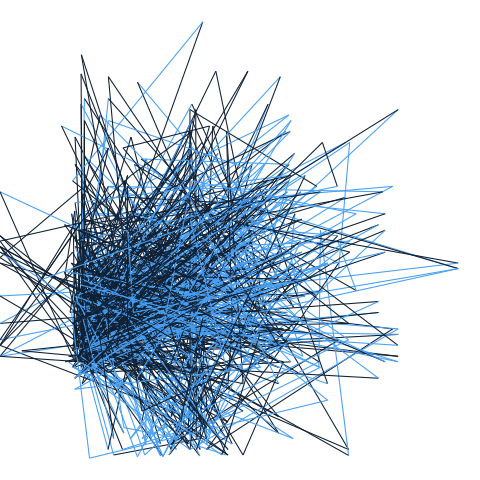

In [216]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = Survived)) +
		theme_nothing()


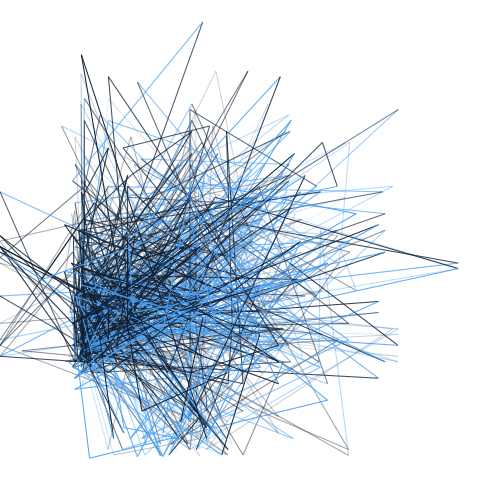

In [217]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = Survived, alpha = row)) +
		theme_nothing()


Honestly, I quite like this..

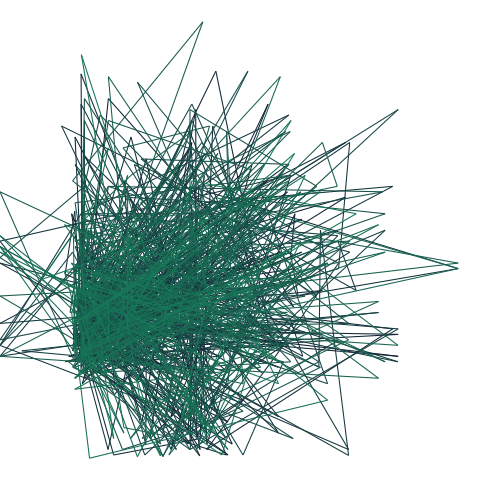

In [220]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = row)) +
		scale_color_gradient( high = "#118B6C" ) +
		theme_nothing()


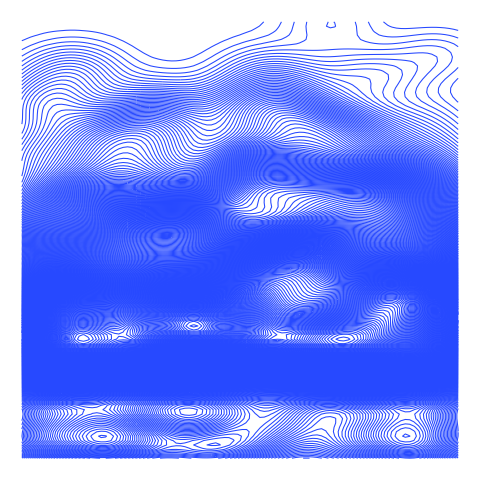

In [234]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, col = row)) +
		geom_density_2d(bins = 300) +
		# geom_contour_filled() +
		theme_nothing()
		


Hmm, maybe not for this particular dataset